# Description

* Describes almost 1.6 million traffic accidents from police reports in UK.
* Not include minor accidents
* 2005 - 2014 (2008 is missing)
* 33 variables
* link: [UK traffic accidents](https://www.kaggle.com/daveianhickey/2000-16-traffic-flow-england-scotland-wales/data)

## Question

What is the relationship between track conditions and accident severity?

## Variables

Categorical variables:

* Accident_Severity
* Road_Type
* Light_Conditions
* Weather_Conditions
* Road_Surface_Conditions
* Special_Conditions_at_Site
* Carriageway_Hazards
* Speed_limit
* Year

Numerical variables:

* Number_of_Vehicles
* Number_of_Casualties

# Basic Analysis

In [1]:
# Basic libs
library(dplyr, warn.conflicts = FALSE)
library(ggplot2)

In [2]:
# loading data
accidents <- read.csv("uk_accidents.csv", stringsAsFactors = FALSE)

## Problems with numerical values

### Variable Number_of_Casualties

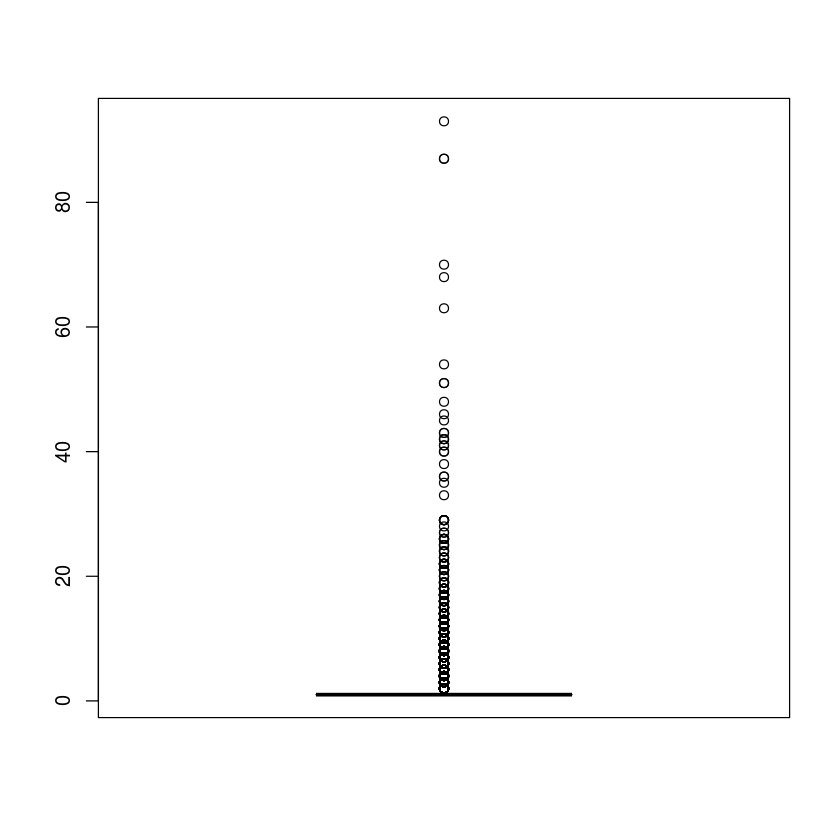

In [3]:
# boxplot of number of casualties
boxplot(accidents$Number_of_Casualties)

In [4]:
summary(accidents$Number_of_Casualties)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.351   1.000  93.000 

With 1st quartile, median and 3rd quartile equals to 1, the majority number of accidents is 1. There exists large number of outliers. Because of that, to better visualize the data, this variable will be transformed to categorical data.

First, there exists null or empty values?

In [5]:
sum(is.na(accidents$Number_of_Casualties))
sum(accidents$Number_of_Casualties == "")

[1] 0

[1] 0

No, not exists null or empty values.

Create a categorical variable from Number_of_Casualties:

In [6]:
accidents <- mutate(accidents, casualties_group = 
ifelse(Number_of_Casualties %in% 0:1, "1", 
ifelse(Number_of_Casualties %in% 2, "2",
ifelse(Number_of_Casualties %in% 3, "3","4 or more"))))

barplot of casualties_group:

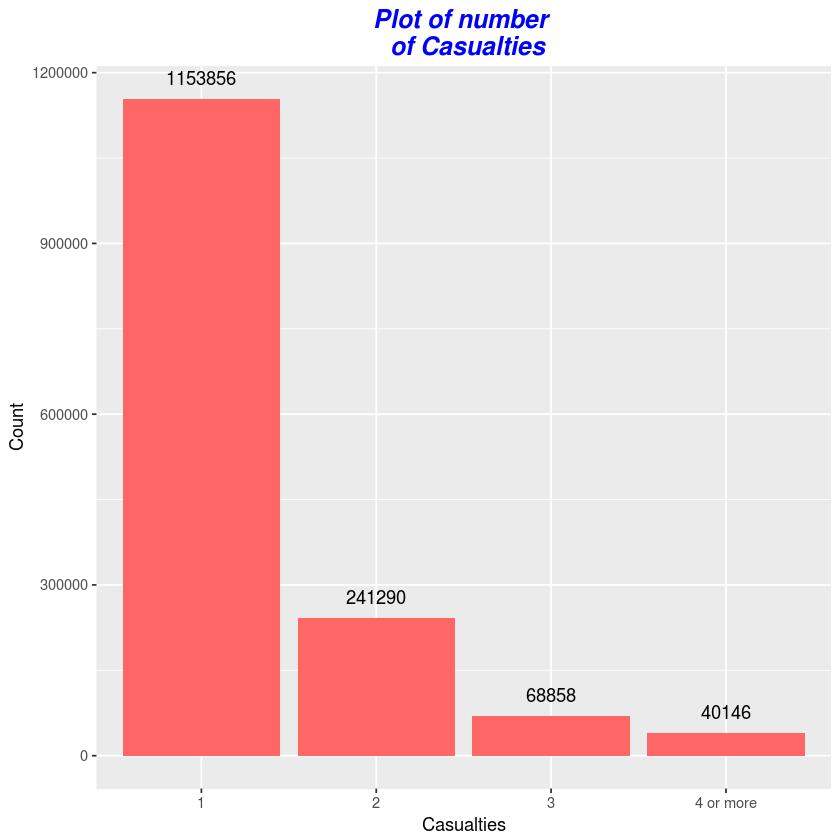

In [7]:
ggplot(accidents, aes(x = casualties_group)) + geom_bar(fill = "#FF6666") +
  xlab("Casualties") + ylab("Count") + 
  geom_text(stat = "count", aes(y = ..count.., label = ..count..), vjust = -1) +
  ggtitle("Plot of number \n of Casualties") +
  theme(plot.title =element_text(hjust = 0.5, color="blue",size=15,
                                 face="bold.italic", vjust = -1))

### Variable Number_of_Vehicles